In [15]:
# example of making predictions for a regression problem
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from numpy import array
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("stats2.csv")
df.head()

,Att,Cmp,Pct,Yds,YPA,TD%,Int,Int%,Lg,Sack,Loss,Rate,TD
0,554,337,60.8,4132,7.5,5.4,14,2.5,65,23,217,91.4,30
1,451,257,57.0,3529,7.8,6.0,12,2.7,56,27,213,91.0,27
2,404,240,59.4,3199,7.9,7.4,19,4.7,74,23,191,89.7,30
3,463,257,55.5,3544,7.7,6.7,16,3.5,81,35,324,88.2,31
4,273,176,64.5,1795,6.6,5.5,9,3.3,71,15,100,87.8,15


In [17]:
train_x_df = df.drop(columns=["TD"])
train_x_df.head()

,Att,Cmp,Pct,Yds,YPA,TD%,Int,Int%,Lg,Sack,Loss,Rate
0,554,337,60.8,4132,7.5,5.4,14,2.5,65,23,217,91.4
1,451,257,57.0,3529,7.8,6.0,12,2.7,56,27,213,91.0
2,404,240,59.4,3199,7.9,7.4,19,4.7,74,23,191,89.7
3,463,257,55.5,3544,7.7,6.7,16,3.5,81,35,324,88.2
4,273,176,64.5,1795,6.6,5.5,9,3.3,71,15,100,87.8


In [18]:
X_train = train_x_df.values
X_train.shape
n_cols = X_train.shape[1]

In [19]:
train_y_df = df[['TD']]
train_y_df.head()

,TD
0,30
1,27
2,30
3,31
4,15


In [20]:
y_train = train_y_df.values 
y_train.shape

(2446, 1)

In [21]:
#create model
model = Sequential()
#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=1200, shuffle=True, verbose=2, validation_split=0.25)

Train on 1834 samples, validate on 612 samples
Epoch 1/1200
 - 0s - loss: 23017.2521 - acc: 0.0027 - val_loss: 3306.5556 - val_acc: 0.0147
Epoch 2/1200
 - 0s - loss: 967.0052 - acc: 0.0125 - val_loss: 45.0869 - val_acc: 0.0441
Epoch 3/1200
 - 0s - loss: 21.0086 - acc: 0.0840 - val_loss: 11.1704 - val_acc: 0.1029
Epoch 4/1200
 - 0s - loss: 16.5204 - acc: 0.1265 - val_loss: 10.7328 - val_acc: 0.1569
Epoch 5/1200
 - 0s - loss: 16.0915 - acc: 0.1619 - val_loss: 10.1290 - val_acc: 0.2124
Epoch 6/1200
 - 0s - loss: 15.7527 - acc: 0.1783 - val_loss: 10.2465 - val_acc: 0.2484
Epoch 7/1200
 - 0s - loss: 15.4103 - acc: 0.2350 - val_loss: 9.7227 - val_acc: 0.3775
Epoch 8/1200
 - 0s - loss: 15.0795 - acc: 0.2628 - val_loss: 9.7286 - val_acc: 0.3840
Epoch 9/1200
 - 0s - loss: 14.7585 - acc: 0.2672 - val_loss: 9.6482 - val_acc: 0.3840
Epoch 10/1200
 - 0s - loss: 14.4301 - acc: 0.2694 - val_loss: 9.6557 - val_acc: 0.3889
Epoch 11/1200
 - 0s - loss: 14.1217 - acc: 0.2715 - val_loss: 9.0484 - val_acc: 

Epoch 96/1200
 - 0s - loss: 8.5777 - acc: 0.3299 - val_loss: 7.1654 - val_acc: 0.5163
Epoch 97/1200
 - 0s - loss: 8.5778 - acc: 0.3282 - val_loss: 6.9333 - val_acc: 0.5163
Epoch 98/1200
 - 0s - loss: 8.7550 - acc: 0.3315 - val_loss: 7.0060 - val_acc: 0.5180
Epoch 99/1200
 - 0s - loss: 9.2514 - acc: 0.3342 - val_loss: 6.9616 - val_acc: 0.4951
Epoch 100/1200
 - 0s - loss: 8.4885 - acc: 0.3364 - val_loss: 6.9757 - val_acc: 0.5016
Epoch 101/1200
 - 0s - loss: 9.0328 - acc: 0.3348 - val_loss: 6.9414 - val_acc: 0.5131
Epoch 102/1200
 - 0s - loss: 8.5969 - acc: 0.3228 - val_loss: 6.9942 - val_acc: 0.4984
Epoch 103/1200
 - 0s - loss: 8.7464 - acc: 0.3299 - val_loss: 6.9110 - val_acc: 0.4984
Epoch 104/1200
 - 0s - loss: 8.9849 - acc: 0.3413 - val_loss: 7.0173 - val_acc: 0.4935
Epoch 105/1200
 - 0s - loss: 8.8860 - acc: 0.3179 - val_loss: 7.3256 - val_acc: 0.5147
Epoch 106/1200
 - 0s - loss: 8.9623 - acc: 0.3282 - val_loss: 7.9357 - val_acc: 0.5196
Epoch 107/1200
 - 0s - loss: 8.7228 - acc: 0.34

Epoch 191/1200
 - 0s - loss: 6.0876 - acc: 0.3730 - val_loss: 6.2388 - val_acc: 0.5899
Epoch 192/1200
 - 0s - loss: 5.4086 - acc: 0.3920 - val_loss: 5.1257 - val_acc: 0.5931
Epoch 193/1200
 - 0s - loss: 5.4285 - acc: 0.3828 - val_loss: 8.6582 - val_acc: 0.5735
Epoch 194/1200
 - 0s - loss: 5.7313 - acc: 0.3975 - val_loss: 5.3700 - val_acc: 0.5784
Epoch 195/1200
 - 0s - loss: 5.2251 - acc: 0.3980 - val_loss: 5.6667 - val_acc: 0.5899
Epoch 196/1200
 - 0s - loss: 5.6549 - acc: 0.3882 - val_loss: 5.3997 - val_acc: 0.5899
Epoch 197/1200
 - 0s - loss: 5.1922 - acc: 0.3959 - val_loss: 5.1224 - val_acc: 0.6013
Epoch 198/1200
 - 0s - loss: 5.1477 - acc: 0.3991 - val_loss: 6.0553 - val_acc: 0.6209
Epoch 199/1200
 - 0s - loss: 5.1519 - acc: 0.3855 - val_loss: 6.4695 - val_acc: 0.5752
Epoch 200/1200
 - 0s - loss: 4.6435 - acc: 0.3964 - val_loss: 4.5858 - val_acc: 0.5931
Epoch 201/1200
 - 0s - loss: 5.0681 - acc: 0.3888 - val_loss: 5.6621 - val_acc: 0.5931
Epoch 202/1200
 - 0s - loss: 4.9252 - acc: 

 - 0s - loss: 1.3246 - acc: 0.4885 - val_loss: 1.0836 - val_acc: 0.6797
Epoch 286/1200
 - 0s - loss: 1.0518 - acc: 0.5474 - val_loss: 0.8679 - val_acc: 0.7157
Epoch 287/1200
 - 0s - loss: 0.9130 - acc: 0.5578 - val_loss: 1.2712 - val_acc: 0.6552
Epoch 288/1200
 - 0s - loss: 0.8806 - acc: 0.5605 - val_loss: 1.0527 - val_acc: 0.6846
Epoch 289/1200
 - 0s - loss: 1.0479 - acc: 0.5316 - val_loss: 0.8619 - val_acc: 0.6912
Epoch 290/1200
 - 0s - loss: 0.8601 - acc: 0.5725 - val_loss: 0.9592 - val_acc: 0.7239
Epoch 291/1200
 - 0s - loss: 0.7371 - acc: 0.5965 - val_loss: 0.8868 - val_acc: 0.6520
Epoch 292/1200
 - 0s - loss: 0.7361 - acc: 0.5960 - val_loss: 1.2410 - val_acc: 0.6291
Epoch 293/1200
 - 0s - loss: 0.9385 - acc: 0.5382 - val_loss: 0.9224 - val_acc: 0.6650
Epoch 294/1200
 - 0s - loss: 0.8643 - acc: 0.5545 - val_loss: 1.1239 - val_acc: 0.6193
Epoch 295/1200
 - 0s - loss: 0.8005 - acc: 0.5616 - val_loss: 0.7224 - val_acc: 0.7337
Epoch 296/1200
 - 0s - loss: 0.9767 - acc: 0.5469 - val_lo

Epoch 380/1200
 - 0s - loss: 0.4920 - acc: 0.6336 - val_loss: 0.5367 - val_acc: 0.7010
Epoch 381/1200
 - 0s - loss: 0.7372 - acc: 0.5938 - val_loss: 0.5521 - val_acc: 0.6993
Epoch 382/1200
 - 0s - loss: 0.4614 - acc: 0.6439 - val_loss: 0.6721 - val_acc: 0.7075
Epoch 383/1200
 - 0s - loss: 0.4584 - acc: 0.6445 - val_loss: 0.4921 - val_acc: 0.7337
Epoch 384/1200
 - 0s - loss: 0.5048 - acc: 0.6303 - val_loss: 0.5664 - val_acc: 0.6895
Epoch 385/1200
 - 0s - loss: 0.5563 - acc: 0.5763 - val_loss: 0.4967 - val_acc: 0.7239
Epoch 386/1200
 - 0s - loss: 0.6649 - acc: 0.6178 - val_loss: 0.5133 - val_acc: 0.7631
Epoch 387/1200
 - 0s - loss: 0.3938 - acc: 0.6838 - val_loss: 0.5102 - val_acc: 0.7271
Epoch 388/1200
 - 0s - loss: 0.4372 - acc: 0.6341 - val_loss: 0.4930 - val_acc: 0.7353
Epoch 389/1200
 - 0s - loss: 0.4746 - acc: 0.6396 - val_loss: 0.7370 - val_acc: 0.6993
Epoch 390/1200
 - 0s - loss: 0.6051 - acc: 0.6216 - val_loss: 0.5621 - val_acc: 0.7549
Epoch 391/1200
 - 0s - loss: 0.4318 - acc: 

Epoch 475/1200
 - 0s - loss: 0.3369 - acc: 0.7067 - val_loss: 0.6946 - val_acc: 0.7386
Epoch 476/1200
 - 0s - loss: 0.3203 - acc: 0.7214 - val_loss: 0.7309 - val_acc: 0.7010
Epoch 477/1200
 - 0s - loss: 0.4765 - acc: 0.6352 - val_loss: 0.5221 - val_acc: 0.7369
Epoch 478/1200
 - 0s - loss: 0.3845 - acc: 0.6712 - val_loss: 0.4179 - val_acc: 0.7859
Epoch 479/1200
 - 0s - loss: 0.5877 - acc: 0.6107 - val_loss: 1.2312 - val_acc: 0.6863
Epoch 480/1200
 - 0s - loss: 0.4335 - acc: 0.6456 - val_loss: 1.6656 - val_acc: 0.6797
Epoch 481/1200
 - 0s - loss: 0.5408 - acc: 0.6341 - val_loss: 0.6533 - val_acc: 0.6209
Epoch 482/1200
 - 0s - loss: 0.3550 - acc: 0.7012 - val_loss: 0.5035 - val_acc: 0.7353
Epoch 483/1200
 - 0s - loss: 0.3642 - acc: 0.6778 - val_loss: 1.0525 - val_acc: 0.6928
Epoch 484/1200
 - 0s - loss: 0.3576 - acc: 0.6848 - val_loss: 0.8201 - val_acc: 0.6062
Epoch 485/1200
 - 0s - loss: 0.5599 - acc: 0.6210 - val_loss: 0.7180 - val_acc: 0.6765
Epoch 486/1200
 - 0s - loss: 0.3829 - acc: 

 - 0s - loss: 0.6162 - acc: 0.6439 - val_loss: 0.4129 - val_acc: 0.8137
Epoch 570/1200
 - 0s - loss: 0.4141 - acc: 0.6799 - val_loss: 1.7217 - val_acc: 0.6144
Epoch 571/1200
 - 0s - loss: 0.5242 - acc: 0.6663 - val_loss: 0.3571 - val_acc: 0.8105
Epoch 572/1200
 - 0s - loss: 0.2946 - acc: 0.7246 - val_loss: 0.4619 - val_acc: 0.7418
Epoch 573/1200
 - 0s - loss: 0.2962 - acc: 0.7317 - val_loss: 0.8151 - val_acc: 0.7239
Epoch 574/1200
 - 0s - loss: 0.5832 - acc: 0.6118 - val_loss: 0.6604 - val_acc: 0.6258
Epoch 575/1200
 - 0s - loss: 0.3420 - acc: 0.7072 - val_loss: 0.5417 - val_acc: 0.7484
Epoch 576/1200
 - 0s - loss: 0.4740 - acc: 0.6908 - val_loss: 0.3578 - val_acc: 0.8203
Epoch 577/1200
 - 0s - loss: 0.3169 - acc: 0.7274 - val_loss: 0.3638 - val_acc: 0.8056
Epoch 578/1200
 - 0s - loss: 0.2689 - acc: 0.7410 - val_loss: 0.4082 - val_acc: 0.8137
Epoch 579/1200
 - 0s - loss: 0.2585 - acc: 0.7612 - val_loss: 0.6925 - val_acc: 0.6569
Epoch 580/1200
 - 0s - loss: 0.2993 - acc: 0.7246 - val_lo

Epoch 664/1200
 - 0s - loss: 0.3444 - acc: 0.6952 - val_loss: 0.4118 - val_acc: 0.8121
Epoch 665/1200
 - 0s - loss: 0.2153 - acc: 0.7824 - val_loss: 0.3709 - val_acc: 0.7451
Epoch 666/1200
 - 0s - loss: 0.2604 - acc: 0.7514 - val_loss: 0.4017 - val_acc: 0.8235
Epoch 667/1200
 - 0s - loss: 0.4707 - acc: 0.6499 - val_loss: 0.4777 - val_acc: 0.7337
Epoch 668/1200
 - 0s - loss: 0.3001 - acc: 0.7077 - val_loss: 0.4427 - val_acc: 0.7745
Epoch 669/1200
 - 0s - loss: 0.3411 - acc: 0.6838 - val_loss: 0.3498 - val_acc: 0.8072
Epoch 670/1200
 - 0s - loss: 0.4150 - acc: 0.6630 - val_loss: 0.3531 - val_acc: 0.8301
Epoch 671/1200
 - 0s - loss: 0.2293 - acc: 0.7732 - val_loss: 0.4260 - val_acc: 0.7908
Epoch 672/1200
 - 0s - loss: 0.3819 - acc: 0.6799 - val_loss: 0.3200 - val_acc: 0.8219
Epoch 673/1200
 - 0s - loss: 0.3368 - acc: 0.7077 - val_loss: 0.3514 - val_acc: 0.7892
Epoch 674/1200
 - 0s - loss: 0.2979 - acc: 0.7268 - val_loss: 0.4803 - val_acc: 0.7663
Epoch 675/1200
 - 0s - loss: 0.4746 - acc: 

 - 0s - loss: 0.2509 - acc: 0.7497 - val_loss: 0.5175 - val_acc: 0.7549
Epoch 759/1200
 - 0s - loss: 0.2897 - acc: 0.7257 - val_loss: 0.3007 - val_acc: 0.8301
Epoch 760/1200
 - 0s - loss: 0.2253 - acc: 0.7764 - val_loss: 0.3493 - val_acc: 0.8366
Epoch 761/1200
 - 0s - loss: 0.2417 - acc: 0.7585 - val_loss: 0.3166 - val_acc: 0.8431
Epoch 762/1200
 - 0s - loss: 0.3038 - acc: 0.7110 - val_loss: 1.2577 - val_acc: 0.6912
Epoch 763/1200
 - 0s - loss: 0.9156 - acc: 0.5862 - val_loss: 1.0433 - val_acc: 0.6503
Epoch 764/1200
 - 0s - loss: 1.1060 - acc: 0.5747 - val_loss: 0.5200 - val_acc: 0.7925
Epoch 765/1200
 - 0s - loss: 0.2708 - acc: 0.7383 - val_loss: 0.4180 - val_acc: 0.7092
Epoch 766/1200
 - 0s - loss: 0.2124 - acc: 0.7933 - val_loss: 0.4366 - val_acc: 0.7582
Epoch 767/1200
 - 0s - loss: 0.2011 - acc: 0.7939 - val_loss: 0.3302 - val_acc: 0.7941
Epoch 768/1200
 - 0s - loss: 0.2047 - acc: 0.7841 - val_loss: 0.3064 - val_acc: 0.8235
Epoch 769/1200
 - 0s - loss: 0.2135 - acc: 0.7803 - val_lo

Epoch 853/1200
 - 0s - loss: 0.3025 - acc: 0.7339 - val_loss: 1.0599 - val_acc: 0.6863
Epoch 854/1200
 - 0s - loss: 0.5574 - acc: 0.6167 - val_loss: 1.9045 - val_acc: 0.6879
Epoch 855/1200
 - 0s - loss: 0.3659 - acc: 0.7214 - val_loss: 0.2894 - val_acc: 0.8448
Epoch 856/1200
 - 0s - loss: 0.2690 - acc: 0.7448 - val_loss: 0.3775 - val_acc: 0.8317
Epoch 857/1200
 - 0s - loss: 0.2572 - acc: 0.7443 - val_loss: 0.8489 - val_acc: 0.7288
Epoch 858/1200
 - 0s - loss: 0.2140 - acc: 0.7923 - val_loss: 0.3233 - val_acc: 0.8497
Epoch 859/1200
 - 0s - loss: 0.2249 - acc: 0.7764 - val_loss: 0.9805 - val_acc: 0.7124
Epoch 860/1200
 - 0s - loss: 0.2802 - acc: 0.7421 - val_loss: 0.2738 - val_acc: 0.8317
Epoch 861/1200
 - 0s - loss: 0.2907 - acc: 0.7377 - val_loss: 0.2760 - val_acc: 0.8399
Epoch 862/1200
 - 0s - loss: 0.1910 - acc: 0.8064 - val_loss: 0.3835 - val_acc: 0.8105
Epoch 863/1200
 - 0s - loss: 0.3733 - acc: 0.6734 - val_loss: 0.6279 - val_acc: 0.6993
Epoch 864/1200
 - 0s - loss: 0.3387 - acc: 

 - 0s - loss: 0.2615 - acc: 0.7301 - val_loss: 0.2625 - val_acc: 0.8644
Epoch 948/1200
 - 0s - loss: 0.1799 - acc: 0.8179 - val_loss: 0.2443 - val_acc: 0.8807
Epoch 949/1200
 - 0s - loss: 0.1398 - acc: 0.8621 - val_loss: 0.2302 - val_acc: 0.8807
Epoch 950/1200
 - 0s - loss: 0.2030 - acc: 0.7830 - val_loss: 0.2289 - val_acc: 0.8938
Epoch 951/1200
 - 0s - loss: 0.2623 - acc: 0.7334 - val_loss: 0.3139 - val_acc: 0.7745
Epoch 952/1200
 - 0s - loss: 0.1537 - acc: 0.8424 - val_loss: 0.3934 - val_acc: 0.8121
Epoch 953/1200
 - 0s - loss: 0.2886 - acc: 0.7274 - val_loss: 0.3038 - val_acc: 0.7435
Epoch 954/1200
 - 0s - loss: 0.1508 - acc: 0.8446 - val_loss: 0.2494 - val_acc: 0.8627
Epoch 955/1200
 - 0s - loss: 0.1403 - acc: 0.8501 - val_loss: 0.2943 - val_acc: 0.8415
Epoch 956/1200
 - 0s - loss: 0.1543 - acc: 0.8408 - val_loss: 0.4049 - val_acc: 0.7614
Epoch 957/1200
 - 0s - loss: 0.2471 - acc: 0.7399 - val_loss: 0.2651 - val_acc: 0.8007
Epoch 958/1200
 - 0s - loss: 0.2360 - acc: 0.7585 - val_lo

Epoch 1041/1200
 - 0s - loss: 0.1924 - acc: 0.7857 - val_loss: 0.2410 - val_acc: 0.8791
Epoch 1042/1200
 - 0s - loss: 0.1314 - acc: 0.8659 - val_loss: 0.2668 - val_acc: 0.8415
Epoch 1043/1200
 - 0s - loss: 0.1535 - acc: 0.8299 - val_loss: 0.1968 - val_acc: 0.8578
Epoch 1044/1200
 - 0s - loss: 0.1202 - acc: 0.8779 - val_loss: 0.2249 - val_acc: 0.8824
Epoch 1045/1200
 - 0s - loss: 0.1996 - acc: 0.7993 - val_loss: 0.4213 - val_acc: 0.7582
Epoch 1046/1200
 - 0s - loss: 0.1663 - acc: 0.8146 - val_loss: 0.3244 - val_acc: 0.8072
Epoch 1047/1200
 - 0s - loss: 0.1677 - acc: 0.8075 - val_loss: 0.6081 - val_acc: 0.6830
Epoch 1048/1200
 - 0s - loss: 0.3245 - acc: 0.6843 - val_loss: 0.2232 - val_acc: 0.8725
Epoch 1049/1200
 - 0s - loss: 0.1217 - acc: 0.8691 - val_loss: 0.2671 - val_acc: 0.8317
Epoch 1050/1200
 - 0s - loss: 0.1512 - acc: 0.8310 - val_loss: 0.2124 - val_acc: 0.8709
Epoch 1051/1200
 - 0s - loss: 0.2293 - acc: 0.7585 - val_loss: 0.2942 - val_acc: 0.8399
Epoch 1052/1200
 - 0s - loss: 0.

 - 0s - loss: 0.1371 - acc: 0.8479 - val_loss: 0.2947 - val_acc: 0.7484
Epoch 1135/1200
 - 0s - loss: 0.1486 - acc: 0.8261 - val_loss: 0.2136 - val_acc: 0.8791
Epoch 1136/1200
 - 0s - loss: 0.1944 - acc: 0.8043 - val_loss: 0.1978 - val_acc: 0.8676
Epoch 1137/1200
 - 0s - loss: 0.1353 - acc: 0.8511 - val_loss: 0.1907 - val_acc: 0.8938
Epoch 1138/1200
 - 0s - loss: 0.1875 - acc: 0.7863 - val_loss: 0.6149 - val_acc: 0.6732
Epoch 1139/1200
 - 0s - loss: 0.2532 - acc: 0.7492 - val_loss: 0.2142 - val_acc: 0.8219
Epoch 1140/1200
 - 0s - loss: 0.1299 - acc: 0.8642 - val_loss: 0.1859 - val_acc: 0.8922
Epoch 1141/1200
 - 0s - loss: 0.1515 - acc: 0.8408 - val_loss: 0.2059 - val_acc: 0.8807
Epoch 1142/1200
 - 0s - loss: 0.1356 - acc: 0.8522 - val_loss: 0.2033 - val_acc: 0.8627
Epoch 1143/1200
 - 0s - loss: 0.1334 - acc: 0.8528 - val_loss: 0.2401 - val_acc: 0.7958
Epoch 1144/1200
 - 0s - loss: 0.2222 - acc: 0.7754 - val_loss: 0.1941 - val_acc: 0.8905
Epoch 1145/1200
 - 0s - loss: 0.1328 - acc: 0.84

In [24]:
model.save("td_predict.h5")

In [25]:
from keras.models import load_model
model = load_model("td_predict.h5")

In [26]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
test_y_predictions = model.predict(np.array([[450,350,60.8,4132,7.5,5.4,14,2.5,65,23,217,91.4]]))
test_y_predictions

array([[31.619081]], dtype=float32)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


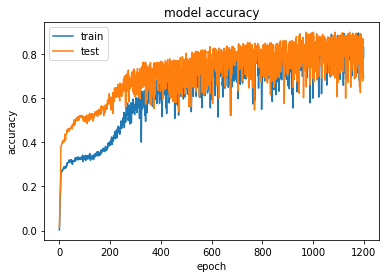

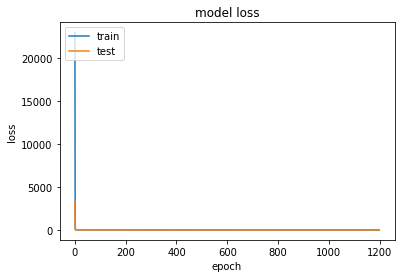

In [27]:
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])  # RAISE ERROR
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('accuracy vs epochs.png')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss']) #RAISE ERROR
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss vs epochs.png')
    plt.show()